In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\lenovo'

In [3]:
df = pd.read_csv("health_fitness_reviews_50.csv")
df.head()

,App Name,Category,Rating,Review Text
0,WorkoutPro,Health & Fitness,5,Very helpful in maintaining fitness goals. Int...
1,RunMaster,Health & Fitness,5,My favorite fitness app. The reminders are sup...
2,FitTrack,Health & Fitness,5,I feel stronger and more energetic thanks to t...
3,FitTrack,Health & Fitness,5,It’s my go-to app every morning.
4,WorkoutPro,Health & Fitness,5,The best health app I’ve used so far!


In [4]:
filtered_df = df[(df['Category'] == "Health & Fitness") & (df['Rating'] == 5)]


In [5]:
# Common stopwords
custom_stopwords = set("""
a about above after again against all am an and any are as at be because been before being below
between both but by can cannot could did do does doing down during each few for from further had
has have having he her here hers herself him himself his how i if in into is it its itself just me
more most my myself no nor not of off on once only or other our ours ourselves out over own same
she should so some such than that the their theirs them themselves then there these they this those
through to too under until up very was we were what when where which while who whom why with you
your yours yourself yourselves
""".split())

# App names from the dataset
app_names = set(df['App Name'].str.lower())


In [6]:
# Combine all reviews into one string
text = " ".join(filtered_df["Review Text"].tolist())

# Clean the text: remove punctuation, convert to lowercase
text_clean = re.sub(r'[^a-zA-Z\s]', '', text).lower()

# Remove stopwords and app names
words = [word for word in text_clean.split() if word not in custom_stopwords and word not in app_names]

# Join the final list back to text
final_text = " ".join(words)


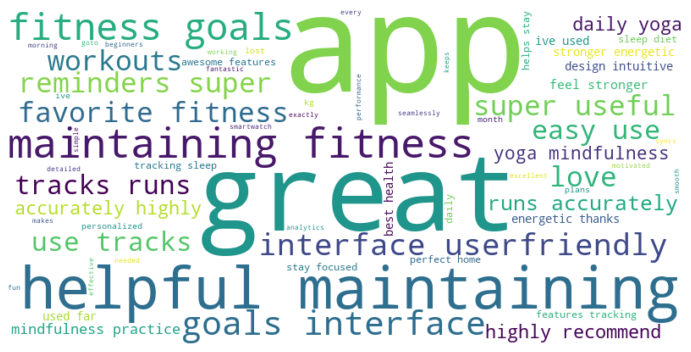

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(final_text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()